In [13]:
#importing the essential
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy import interpolate, signal, ndimage
from scipy import stats
data_path = './data/'
fig_path = './fig/' 

## Parameter

V_max = 5
20pA

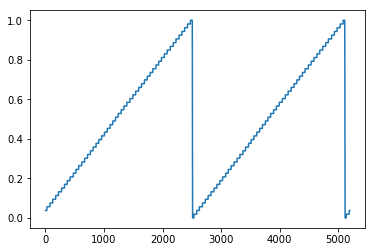

In [14]:
df_a1_unclean = pd.read_csv(data_path + '15V_acc_2.3V_fil_10VPP_1stPeak.CSV', skiprows = 15)
df_b1_unclean = pd.read_csv(data_path + '15V_acc_2.3Vfil_10VPP_1stPeak_3VRetarding.CSV', skiprows = 15)
df_a3_unclean = pd.read_csv(data_path + '22.9V_acc_2.3V_fil_20PP_BothPeaks.CSV', skiprows = 15)
df_a2_unclean = pd.read_csv(data_path + '32V_acc_2.3V_fil_10VPP_2ndPeak.CSV', skiprows = 15)
df_b2_unclean = pd.read_csv(data_path + '32V_acc_2.3Vfil_10VPP_2ndPeak_3VRetarding.CSV', skiprows = 15)
plt.plot(-(df_a2_unclean['CH2'] -df_a2_unclean['CH2'].max())/ (df_a2_unclean['CH2'].max() - df_a2_unclean['CH2'].min()))

In [15]:
def clean(df, offset, p_p, v_offset = 0): 
    df = df[['TIME', 'CH1', 'CH2']]
    df = df.rename(columns={'CH1': 'I(pA)', 'CH2': 'V_acc(V)'})
    df['V_acc(V)'] = (df['V_acc(V)'] - df['V_acc(V)'].max())/ (df['V_acc(V)'].min() - df['V_acc(V)'].max()) - 0.5
    df['V_acc(V)'] = df['V_acc(V)'] * p_p + offset
#     df['I(pA)'] = (df['I(pA)'] - df['V_acc(V)'].max())/ (df['V_acc(V)'].min() - df['V_acc(V)'].max()) - 0.5
#     df['I(pA)'] = df['I(pA)'] * p_p + offset
    df['I(pA)'] =  -(df['I(pA)'] )/5 * 20 
    return df
df_a1_unsmooth = clean(df_a1_unclean, 15, 10, 0.0)
df_a2_unsmooth = clean(df_a2_unclean, 32, 10, 0.0)
df_a3_unsmooth = clean(df_a3_unclean, 22.9, 20, 0.0)
df_b1_unsmooth = clean(df_b1_unclean, 15, 10, 0.0)
df_b2_unsmooth = clean(df_b2_unclean, 32, 10, 0.0)

[14.3196853  16.11328604 17.40771408]


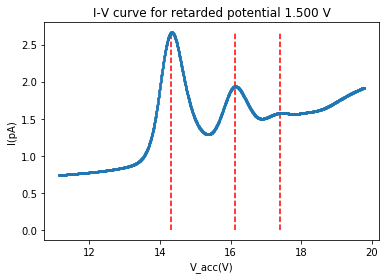

In [16]:
# smoothen the function
df_a1_unsmooth_temp  = df_a1_unsmooth.copy().loc[:2130]
df_a1 = df_a1_unsmooth_temp
df_a1['V_acc(V)'] = ndimage.gaussian_filter(df_a1_unsmooth_temp['V_acc(V)'].values, sigma = 40)
df_a1['I(pA)'] = ndimage.gaussian_filter(df_a1_unsmooth_temp['I(pA)'].values, sigma = 40)
plt.plot(df_a1['V_acc(V)'], df_a1['I(pA)'], '.', markersize = 3)
plt.xlabel('V_acc(V)')
plt.ylabel('I(pA)')
plt.title('I-V curve for retarded potential {:.3f} V'.format(1.5))
plt.savefig(fig_path + 'peak_1_1.png', dpi = 300)
widths = np.linspace(60, 100, num = 100)
peakA = signal.find_peaks_cwt(df_a1['I(pA)'].values, widths)[1:-1]
plt.vlines(df_a1['V_acc(V)'].values[peakA], 0, df_a1['I(pA)'].max(), 'r', linestyle = '--')
print(df_a1['V_acc(V)'].values[peakA])
A_crit = df_a1['V_acc(V)'].values[peakA]

[31.01362939 32.88512172 34.64239799]


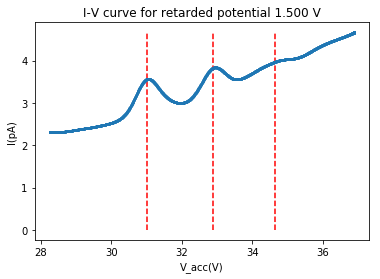

In [17]:
# smoothen the function
df_a2_unsmooth_temp  = df_a2_unsmooth.copy().loc[200:2510]
df_a2 = df_a2_unsmooth_temp
df_a2['V_acc(V)'] = ndimage.gaussian_filter(df_a2_unsmooth_temp['V_acc(V)'].values, sigma = 40)
df_a2['I(pA)'] = ndimage.gaussian_filter(df_a2_unsmooth_temp['I(pA)'].values, sigma = 40)
plt.plot(df_a2['V_acc(V)'], df_a2['I(pA)'], '.', markersize = 3)
plt.xlabel('V_acc(V)')
plt.ylabel('I(pA)')
plt.title('I-V curve for retarded potential {:.3f} V'.format(1.5))
plt.savefig(fig_path + 'peak_1_2.png', dpi = 300)
widths = np.linspace(60, 100, num = 100)
peakA = signal.find_peaks_cwt(df_a2['I(pA)'].values, widths)[1:-1]
plt.vlines(df_a2['V_acc(V)'].values[peakA], 0, df_a2['I(pA)'].max(), 'r', linestyle = '--')
print(df_a2['V_acc(V)'].values[peakA])
A2_crit = df_a2['V_acc(V)'].values[peakA]

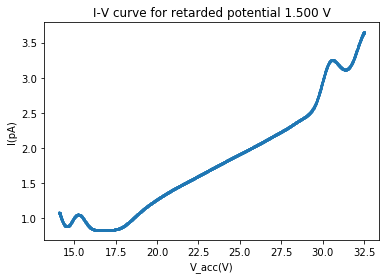

In [18]:
# smoothen the function
df_a3_unsmooth_temp  = df_a3_unsmooth.copy().loc[200:2600]
df_a3 = df_a3_unsmooth_temp
df_a3['V_acc(V)'] = ndimage.gaussian_filter(df_a3_unsmooth_temp['V_acc(V)'].values, sigma = 40)
df_a3['I(pA)'] = ndimage.gaussian_filter(df_a3_unsmooth_temp['I(pA)'].values, sigma = 40)
plt.plot(df_a3['V_acc(V)'], df_a3['I(pA)'], '.', markersize = 3)
plt.xlabel('V_acc(V)')
plt.ylabel('I(pA)')
plt.title('I-V curve for retarded potential {:.3f} V'.format(1.5))
plt.savefig(fig_path + 'peak_1_all.png', dpi = 300)

[14.36874425 16.17780327 17.51601294]


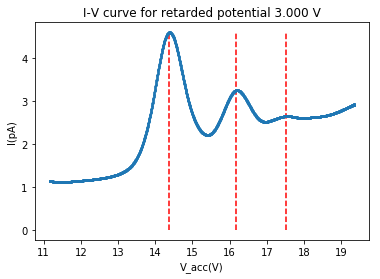

In [19]:
df_b1_unsmooth_temp  = df_b1_unsmooth.copy().loc[300:2500]
df_b1 = df_b1_unsmooth_temp
df_b1['V_acc(V)'] = ndimage.gaussian_filter(df_b1_unsmooth_temp['V_acc(V)'].values, sigma = 40)
df_b1['I(pA)'] = ndimage.gaussian_filter(df_b1_unsmooth_temp['I(pA)'].values, sigma = 40)
plt.plot(df_b1['V_acc(V)'], df_b1['I(pA)'], '.', markersize = 3)
plt.xlabel('V_acc(V)')
plt.ylabel('I(pA)')
plt.title('I-V curve for retarded potential {:.3f} V'.format(3.0))
plt.savefig(fig_path + 'peak_2_1.png', dpi = 300)
widths = np.linspace(60, 100, num = 100)
peakB = signal.find_peaks_cwt(df_b1['I(pA)'].values, widths)[1:-1]
plt.vlines(df_b1['V_acc(V)'].values[peakB], 0, df_b1['I(pA)'].max(), 'r', linestyle = '--')
print(df_b1['V_acc(V)'].values[peakB])
B_crit = df_b1['V_acc(V)'].values[peakB]

[30.90334128 32.70526047 34.39817992]


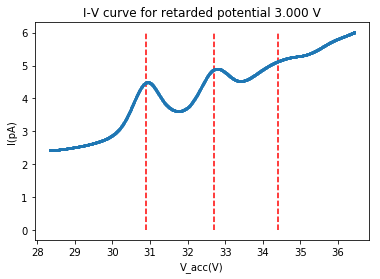

In [20]:
df_b2_unsmooth_temp  = df_b2_unsmooth.copy().loc[300:2500]
df_b2 = df_b2_unsmooth_temp
df_b2['V_acc(V)'] = ndimage.gaussian_filter(df_b2_unsmooth_temp['V_acc(V)'].values, sigma = 40)
df_b2['I(pA)'] = ndimage.gaussian_filter(df_b2_unsmooth_temp['I(pA)'].values, sigma = 40)
plt.plot(df_b2['V_acc(V)'], df_b2['I(pA)'], '.', markersize = 3)
plt.xlabel('V_acc(V)')
plt.ylabel('I(pA)')
plt.title('I-V curve for retarded potential {:.3f} V'.format(3.0))
plt.savefig(fig_path + 'peak_2_2.png', dpi = 300)
widths = np.linspace(60, 100, num = 100)
peakB = signal.find_peaks_cwt(df_b2['I(pA)'].values, widths)[1:-1]
plt.vlines(df_b2['V_acc(V)'].values[peakB], 0, df_b2['I(pA)'].max(), 'r', linestyle = '--')
print(df_b2['V_acc(V)'].values[peakB])
B2_crit = df_b2['V_acc(V)'].values[peakB]

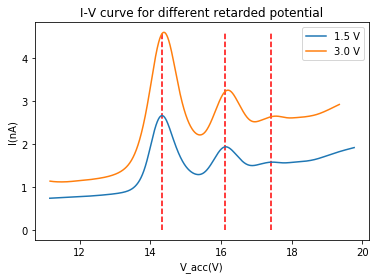

In [75]:
plt.xlabel('V_acc(V)')
plt.ylabel('I(nA)')
plt.title('I-V curve for different retarded potential')
plt.plot(df_a1['V_acc(V)'], df_a1['I(pA)'], markersize = 3, label = '1.5 V')
# plt.plot(df_a2['V_acc(V)'], df_a2['I(pA)'], markersize = 3)
# plt.plot(df_a3['V_acc(V)'], df_a3['I(pA)']+0.7, markersize = 3)
plt.plot(df_b1['V_acc(V)'], df_b1['I(pA)'], markersize = 3, label = '3.0 V')
# plt.plot(df_b2['V_acc(V)'], df_b2['I(pA)'], markersize = 3)


# plt.yscale('log')
plt.vlines(A_crit, 0, df_b1['I(pA)'].max(), 'r', linestyle = '--')
plt.legend()
# plt.vlines(df_a['V_acc(V)'].values[peakA], 0, df_a['I(nA)'].max(), 'r', linestyle = '--')
plt.savefig(fig_path + 'peak1.png', dpi = 300)

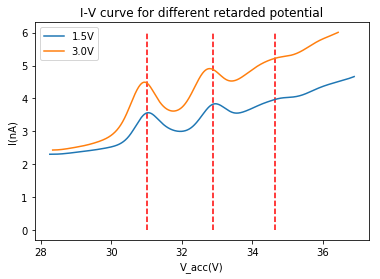

In [44]:
plt.title('I-V curve for different retarded potential')
plt.plot(df_a2['V_acc(V)'], df_a2['I(pA)'], markersize = 3, label  = '1.5V')
# plt.plot(df_a2['V_acc(V)'], df_a2['I(pA)'], markersize = 3)
# plt.plot(df_a3['V_acc(V)'], df_a3['I(pA)']+0.7, markersize = 3)
plt.plot(df_b2['V_acc(V)'], df_b2['I(pA)'], markersize = 3, label  = '3.0V')
plt.xlabel('V_acc(V)')
plt.ylabel('I(nA)')
plt.legend()
plt.vlines(A2_crit, 0, df_b2['I(pA)'].max(), 'r', linestyle = '--')
plt.savefig(fig_path + 'peak2.png', dpi = 300)

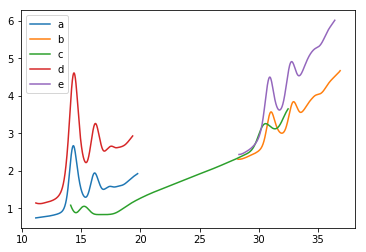

In [23]:
plt.plot(df_a1['V_acc(V)'], df_a1['I(pA)'], markersize = 3, label = 'a')
plt.plot(df_a2['V_acc(V)'], df_a2['I(pA)'], markersize = 3, label = 'b')
plt.plot(df_a3['V_acc(V)'], df_a3['I(pA)'], markersize = 3, label = 'c')
plt.plot(df_b1['V_acc(V)'], df_b1['I(pA)'], markersize = 3, label = 'd')
plt.plot(df_b2['V_acc(V)'], df_b2['I(pA)'], markersize = 3, label = 'e')
plt.legend()

[14.3196853  16.11328604 17.40771408]
[31.01362939 32.88512172 34.64239799]
[14.36874425 16.17780327 17.51601294]
[30.90334128 32.70526047 34.39817992]


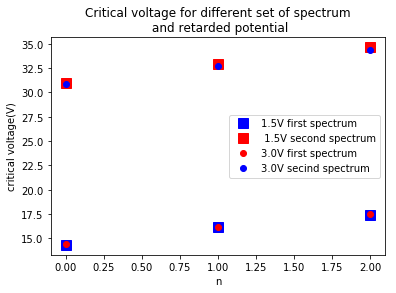

In [30]:
plt.plot(A_crit, 'bs', markersize = 10, label = '1.5V first spectrum')
plt.plot(A2_crit, 'rs', markersize = 10, label  = ' 1.5V second spectrum')
plt.plot(B_crit, 'ro', label = '3.0V first spectrum')
plt.plot(B2_crit, 'bo', label = '3.0V secind spectrum')
plt.legend()
plt.xlabel('n')
plt.ylabel('critical voltage(V)')
plt.title('Critical voltage for different set of spectrum\n and retarded potential')
print(A_crit, A2_crit, B_crit, B2_crit, sep = '\n')
# plt.savefig(fig_path+ 'loc_min.png', dpi = 300)


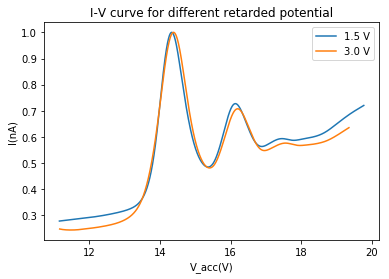

In [74]:
plt.xlabel('V_acc(V)')
plt.ylabel('I(nA)')
plt.title('I-V curve for different retarded potential')
norm = df_a1['I(pA)'][df_a1['V_acc(V)'] == A_crit[0]].values[0]
plt.plot(df_a1['V_acc(V)'], df_a1['I(pA)']/norm,markersize = 3, label = '1.5 V',)
# plt.plot(df_a2['V_acc(V)'], df_a2['I(pA)'], markersize = 3)
# plt.plot(df_a3['V_acc(V)'], df_a3['I(pA)']+0.7, markersize = 3)
norm2 = df_b1['I(pA)'][df_b1['V_acc(V)'] == B_crit[0]].values[0]
plt.plot(df_b1['V_acc(V)'], df_b1['I(pA)'] / norm2, markersize = 3, label = '3.0 V')
# plt.plot(df_b2['V_acc(V)'], df_b2['I(pA)'], markersize = 3)


# plt.yscale('log')
# plt.vlines(A_crit, 0, df_b1['I(pA)'].max()/norm, 'r', linestyle = '--')
plt.legend()
# plt.vlines(df_a['V_acc(V)'].values[peakA], 0, df_a['I(nA)'].max(), 'r', linestyle = '--')
# plt.savefig(fig_path + 'peak1.png', dpi = 300)